In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stdev
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

## 1. Entorno

In [2]:
data=np.load("proyecto_training_data.npy")

In [3]:
dataset=pd.DataFrame(data,columns=['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd','YearBuilt', 'LotFrontage'])
dataset.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


## 2. Slicing 80% training; 20% testing

### Training

In [4]:
datasetTraining=dataset.sample(n=1168)
datasetTraining.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
645,143250.0,6.0,981.0,5.0,1971.0,NaN
382,213500.0,7.0,939.0,8.0,2006.0,79.0
8,129900.0,7.0,1022.0,8.0,1931.0,51.0
1248,129500.0,6.0,1134.0,8.0,1917.0,60.0
111,180000.0,7.0,774.0,7.0,2000.0,NaN


### Testing

In [5]:
dft=dataset.merge(datasetTraining.drop_duplicates(), on=['SalePrice', 'OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'], how='left', indicator=True)
dft=dft[dft._merge=='left_only']
datasetTesting=dft.drop(['_merge'], axis=1)
datasetTesting.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
5,143000.0,5.0,796.0,5.0,1993.0,85.0
9,118000.0,5.0,1077.0,5.0,1939.0,50.0
11,345000.0,9.0,1182.0,11.0,2005.0,85.0


## 3. Analisis exploratorio

In [6]:
def exploratoryAnalysis(df):
    for col in df.columns:
        media=df[col].mean()
        maxValue=df[col].max()
        minValue=df[col].min()
        rango=maxValue-minValue
        std=stdev.stdev(df[col])
        print(col + ' - Media: ' + str(media) + ' - Valor maximo: ' + str(maxValue) + ' - Valor minimo: ' + str(minValue) + ' - Rango: ' + str(rango) + '- Desviación estandard: ' + str(std))

In [7]:
exploratoryAnalysis(datasetTraining)

SalePrice - Media: 181688.198630137 - Valor maximo: 755000.0 - Valor minimo: 34900.0 - Rango: 720100.0- Desviación estandard: 80044.80762768099
OverallQual - Media: 6.125856164383562 - Valor maximo: 10.0 - Valor minimo: 1.0 - Rango: 9.0- Desviación estandard: 1.3942282616007018
1stFlrSF - Media: 1162.021404109589 - Valor maximo: 4692.0 - Valor minimo: 334.0 - Rango: 4358.0- Desviación estandard: 385.59053461052645
TotRmsAbvGrd - Media: 6.500856164383562 - Valor maximo: 14.0 - Valor minimo: 2.0 - Rango: 12.0- Desviación estandard: 1.6070749597221374
YearBuilt - Media: 1971.3039383561643 - Valor maximo: 2010.0 - Valor minimo: 1872.0 - Rango: 138.0- Desviación estandard: 30.434628017948306
LotFrontage - Media: 70.61307053941908 - Valor maximo: 313.0 - Valor minimo: 21.0 - Rango: 292.0- Desviación estandard: nan


## 4. Histograma

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

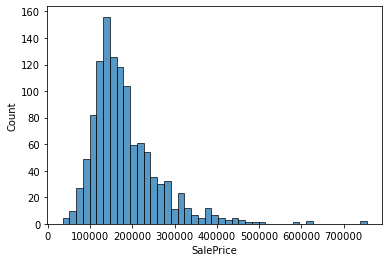

In [8]:
sns.histplot(data=datasetTraining, x='SalePrice')

<AxesSubplot:xlabel='OverallQual', ylabel='Count'>

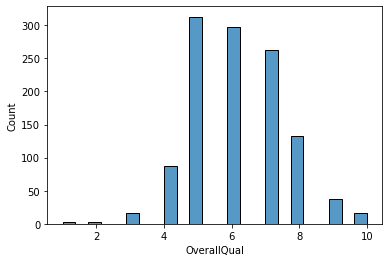

In [9]:
sns.histplot(data=datasetTraining, x='OverallQual')

<AxesSubplot:xlabel='1stFlrSF', ylabel='Count'>

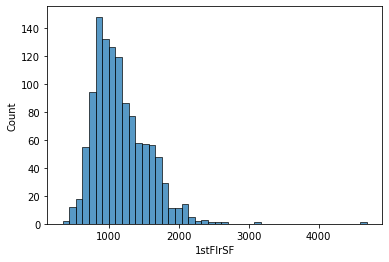

In [10]:
sns.histplot(data=datasetTraining, x='1stFlrSF')

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='Count'>

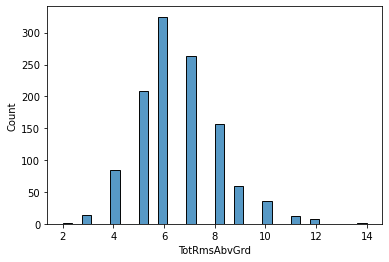

In [11]:
sns.histplot(data=datasetTraining, x='TotRmsAbvGrd')

<AxesSubplot:xlabel='YearBuilt', ylabel='Count'>

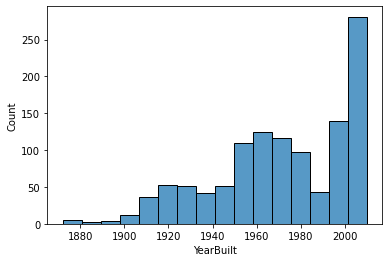

In [12]:
sns.histplot(data=datasetTraining, x='YearBuilt')

<AxesSubplot:xlabel='LotFrontage', ylabel='Count'>

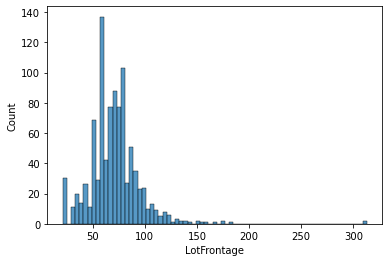

In [13]:
sns.histplot(data=datasetTraining, x='LotFrontage')

## 5. Para cada variable independiente x

### Coeficiente de correlación

In [14]:
def calcCorrCoef(df, target):
    for col in df.columns:
        print('Correlación - ' + col + ':', df[target].corr(df[col], method='pearson'))

In [15]:
calcCorrCoef(datasetTraining, 'SalePrice')

Correlación - SalePrice: 1.0
Correlación - OverallQual: 0.7973080793014009
Correlación - 1stFlrSF: 0.6017111303879663
Correlación - TotRmsAbvGrd: 0.5386481543531542
Correlación - YearBuilt: 0.519523336703961
Correlación - LotFrontage: 0.3525291976939157


### Graficar x vs y (scatterplot)

In [16]:
def scatterplot(df, target):
    for col in df.columns:
        cofcor=df[target].corr(df[col], method='pearson')
        sns.scatterplot(data=df, x=df[col], y=df[target]).set(title=cofcor)
        plt.show()

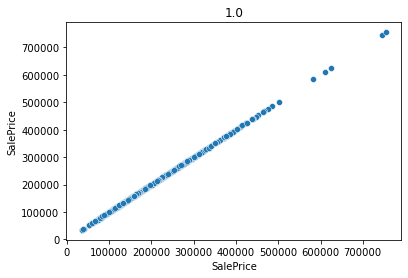

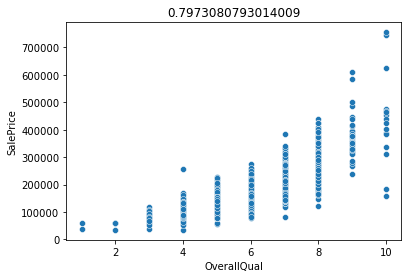

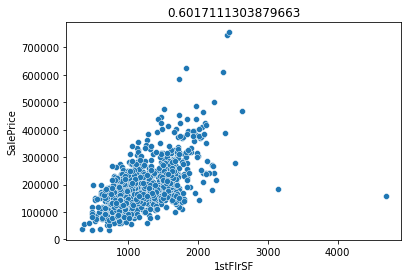

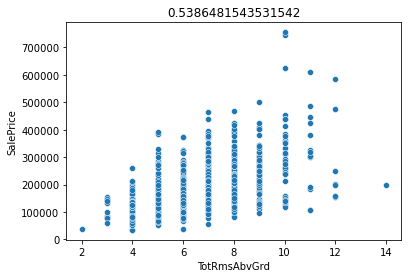

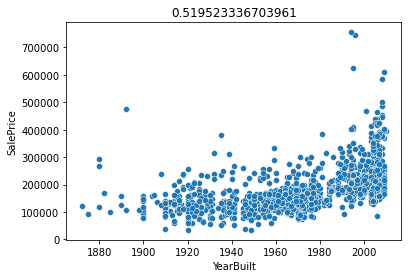

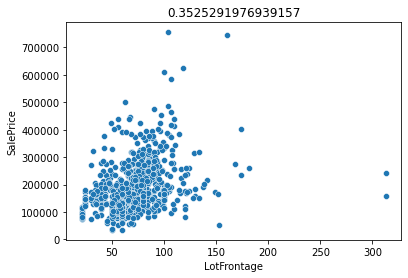

In [17]:
scatterplot(datasetTraining, 'SalePrice')

#### Las dos variables que presentan mayor correlación son: OverallQual y 1stFlrSF

## 6. Función para entrenar un modelo de regresión lineal

In [99]:
x=datasetTraining['1stFlrSF']
y=datasetTraining['SalePrice']
epochs=200
imprimir_error_cada=1
learning_rate=0.00000001


## 7. Creando la función

In [100]:
unos=np.ones(np.shape(x)).reshape(-1,1)
x=x.to_numpy().reshape(-1,1)
a=np.hstack([x,unos])
b0=0
b1=0
errores=[]
iteracionErrores=[]
diccionario={}
for i in range(epochs):
    betas=np.array([b1,b0]).reshape(-1,1)
    yEstimado=np.matmul(a,betas)
    gradienteB0=np.mean(yEstimado-y.to_numpy())
    gradienteB1=np.mean((yEstimado-y.to_numpy())*x)
    
    ##ACTUALIZACIÓN PARAMETROS DEL MODELO
    b0=b0-learning_rate*gradienteB0
    b1=b1-learning_rate*gradienteB1
    
    ##CALCULO DEL GRADIENTE DEL ERROR
    if((i%imprimir_error_cada)==0):
        errores.append(np.mean((yEstimado-y.to_numpy())**2)*1/2)
        iteracionErrores.append(i)
    ##ALMACENAR EN UNA ESTRUCTURA DE DATOS EL MODELO RESULTANTE
    diccionario[i]=[b0, b1]
print("Beta0: ", b0)
print("Beta1: ", b1)

Beta0:  0.13989192464656414
Beta1:  133.98718907592072


In [101]:
#errores, iteracionErrores

In [103]:
#diccionario
yEstimado

array([[131338.99972862],
       [125715.92926572],
       [136828.18756146],
       ...,
       [124778.75085523],
       [110453.30943783],
       [177260.74184234]])

### Función para visualizar como cambia el error en el tiempo

In [22]:
datasetErrores=pd.DataFrame(data=np.array([errores, iteracionErrores]))
datasetErrores=datasetErrores.T
datasetErrores.columns =['Error', 'Iteracion']
datasetErrores.head()

,Error,Iteracion
0,1.970614e+10,0.0
1,1.926374e+10,1.0
2,1.883451e+10,2.0
3,1.841804e+10,3.0
4,1.801396e+10,4.0


In [23]:
def errorsGraph(datasetErrores):
    sns.scatterplot(data=datasetErrores, x=datasetErrores['Iteracion'], y=datasetErrores['Error'])
    plt.show()

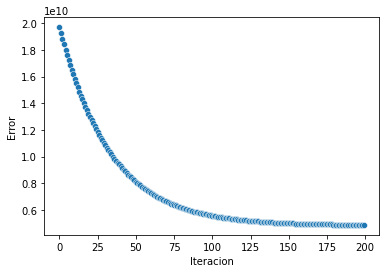

In [24]:
errorsGraph(datasetErrores)

### Evolución del modelo entrenado con el tiempo

In [26]:
datasetModel=pd.DataFrame(data=diccionario)
datasetModel=datasetModel.T
datasetModel.columns =['b0', 'b1']
datasetModel

,b0,b1
0,0.001817,2.111256
1,0.003609,4.190867
2,0.005377,6.239308
3,0.007122,8.257046
4,0.008843,10.244541
...,...,...
195,0.138840,133.559310
196,0.139105,133.668715
197,0.139368,133.776480
198,0.139631,133.882630


In [84]:
def modelEvolution(dataEstructure, n):
    for j in diccionario:
        if((j%n)==0):
            yPred=datasetTraining['1stFlrSF']*diccionario[j][1] + diccionario[j][0]
            sns.scatterplot(data=datasetTraining, x=datasetTraining['1stFlrSF'], y=datasetTraining['SalePrice'])
            plt.plot(datasetTraining['1stFlrSF'], yPred, color = 'green')
            plt.xlabel('X')
            plt.ylabel('y')
            plt.show()

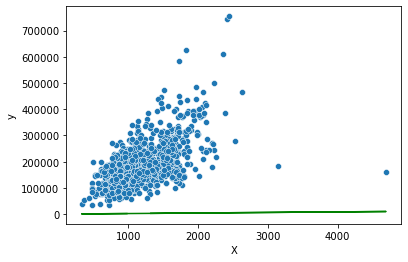

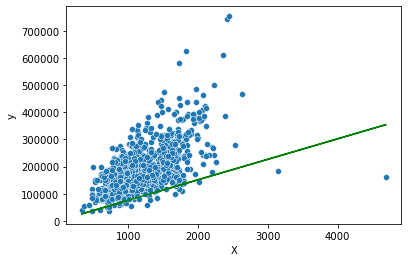

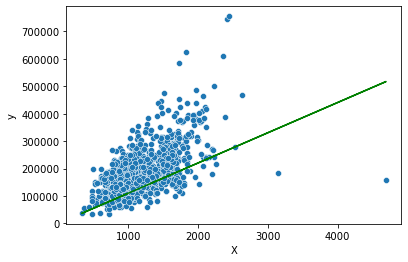

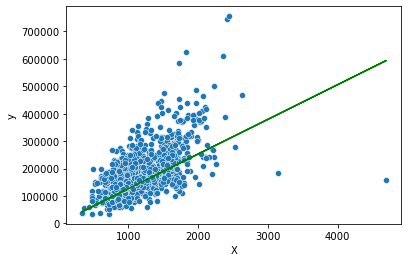

In [85]:
modelEvolution(diccionario,50)

### Utilizar las funciones del punto anterior para entrenar modelos de regresi´on lineal

### usar scikit-learn para entrenar un modelo de regresion lineal

In [128]:
regr = linear_model.LinearRegression()
regr.fit(datasetTraining[['1stFlrSF']], datasetTraining['SalePrice'])
regr.score(datasetTraining[['1stFlrSF']], datasetTraining['SalePrice'])

0.36205628443276405

In [129]:
regr.coef_

array([124.90932053])

In [130]:
regr.intercept_

36540.894606497575

In [131]:
regr.predict(datasetTesting[['1stFlrSF']])

array([194176.45710992, 156578.75163169, 135968.71374495, 171068.23281267,
       184183.71146787, 181185.88777525, 249386.37678228, 117607.04362767,
       180186.61321104, 255382.02416751, 226153.2431645 , 128474.15451341,
       155829.29570853, 143962.91025859, 149209.10172067, 172192.4166974 ,
       231774.16258815, 136967.98830915, 163074.03629902, 189554.81225047,
       164198.22018375, 188180.80972469, 144462.5475407 , 150208.37628488,
       192927.36390466, 107989.02594719, 160326.03124746, 269746.59602796,
       169444.41164583, 203919.38411092, 157702.93551642, 144462.5475407 ,
       143338.36365596, 250510.56066701, 190928.81477625, 188180.80972469,
        96872.09642041,  96872.09642041, 248137.28357702, 232148.89054973,
       114734.12925558, 208291.21032932, 216909.9534456 , 214161.94839403,
       136718.1696681 , 231399.43462658, 144462.5475407 , 180936.0691342 ,
       194176.45710992, 233273.07443446, 150208.37628488, 203419.74682882,
       165822.04135059, 1

In [132]:
regr.fit

<bound method LinearRegression.fit of LinearRegression()>

In [133]:
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
X

array([[1, 1],
       [1, 2],
       [2, 2],
       [2, 3]])